In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [218]:
df = pd.read_csv('dam_occupancy(2021).csv')

In [219]:
df.drop(['GENERAL_DAM_RESERVED_WATER'],axis=1,inplace=True)

In [220]:
df.set_index('DATE',inplace = True)

<AxesSubplot:xlabel='DATE'>

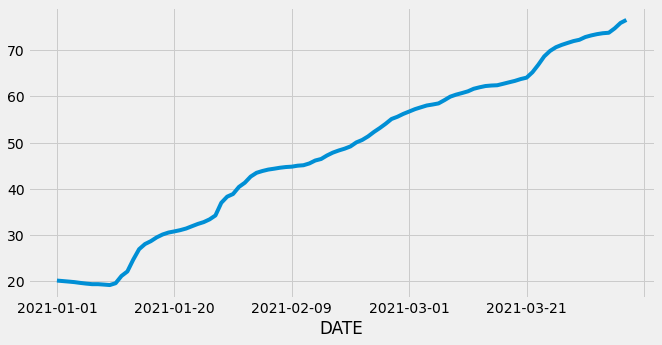

In [221]:
df['GENERAL_DAM_OCCUPANCY_RATE'].plot(figsize=(10,5))

In [222]:
gelecek_gün = 32
df['Predicted'] = df[['GENERAL_DAM_OCCUPANCY_RATE']].shift(-gelecek_gün)
df

,GENERAL_DAM_OCCUPANCY_RATE,Predicted
DATE,,
2021-01-01,20.13,41.30
2021-01-02,20.02,42.63
2021-01-03,19.91,43.45
2021-01-04,19.79,43.84
2021-01-05,19.62,44.15
...,...,...
2021-04-03,73.66,NaN
2021-04-04,73.76,NaN
2021-04-05,74.70,NaN


In [223]:
X = np.array(df.drop(['Predicted'],1))[:-gelecek_gün]
X

array([[20.13],
       [20.02],
       [19.91],
       [19.79],
       [19.62],
       [19.47],
       [19.35],
       [19.35],
       [19.26],
       [19.16],
       [19.56],
       [21.13],
       [22.1 ],
       [24.66],
       [26.92],
       [28.03],
       [28.66],
       [29.48],
       [30.1 ],
       [30.52],
       [30.77],
       [31.04],
       [31.39],
       [31.89],
       [32.38],
       [32.78],
       [33.37],
       [34.22],
       [36.96],
       [38.29],
       [38.86],
       [40.39],
       [41.3 ],
       [42.63],
       [43.45],
       [43.84],
       [44.15],
       [44.34],
       [44.55],
       [44.7 ],
       [44.78],
       [44.99],
       [45.09],
       [45.48],
       [46.11],
       [46.44],
       [47.2 ],
       [47.82],
       [48.28],
       [48.67],
       [49.16],
       [50.03],
       [50.56],
       [51.33],
       [52.29],
       [53.14],
       [54.07],
       [55.1 ],
       [55.58],
       [56.2 ],
       [56.71],
       [57.23],
       [

In [224]:
Y = np.array(df['Predicted'])[:-gelecek_gün]
Y

array([41.3 , 42.63, 43.45, 43.84, 44.15, 44.34, 44.55, 44.7 , 44.78,
       44.99, 45.09, 45.48, 46.11, 46.44, 47.2 , 47.82, 48.28, 48.67,
       49.16, 50.03, 50.56, 51.33, 52.29, 53.14, 54.07, 55.1 , 55.58,
       56.2 , 56.71, 57.23, 57.63, 58.02, 58.23, 58.47, 59.17, 59.93,
       60.37, 60.71, 61.08, 61.64, 61.96, 62.23, 62.34, 62.4 , 62.71,
       63.03, 63.34, 63.74, 64.04, 65.21, 66.84, 68.64, 69.83, 70.63,
       71.14, 71.56, 71.96, 72.24, 72.83, 73.18, 73.46, 73.66, 73.76,
       74.7 , 75.88, 76.53])

In [225]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=25)

In [226]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [234]:
x_gelecek = df.drop(['Predicted'],1)[:-gelecek_gün:]
x_gelecek = x_gelecek.tail(gelecek_gün)
x_gelecek = np.array(x_gelecek)
x_gelecek

array([[43.45],
       [43.84],
       [44.15],
       [44.34],
       [44.55],
       [44.7 ],
       [44.78],
       [44.99],
       [45.09],
       [45.48],
       [46.11],
       [46.44],
       [47.2 ],
       [47.82],
       [48.28],
       [48.67],
       [49.16],
       [50.03],
       [50.56],
       [51.33],
       [52.29],
       [53.14],
       [54.07],
       [55.1 ],
       [55.58],
       [56.2 ],
       [56.71],
       [57.23],
       [57.63],
       [58.02],
       [58.23],
       [58.47]])

In [233]:
tree_pred = tree.predict(x_gelecek)
tree_pred
lr_pred = lr.predict(x_gelecek)
lr_pred

array([62.00074132, 62.31420351, 62.56336577, 62.71607811, 62.88486545,
       63.00542783, 63.06972776, 63.2385151 , 63.31889002, 63.63235221,
       64.1387142 , 64.40395144, 65.01480083, 65.51312534, 65.88284997,
       66.19631216, 66.59014927, 67.28941108, 67.71539815, 68.33428504,
       69.10588427, 69.7890711 , 70.53655786, 71.36441953, 71.75021915,
       72.24854366, 72.65845575, 73.07640534, 73.39790502, 73.71136721,
       73.88015454, 74.07305435])

<ipython-input-241-bc3895a3660a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['tree_pred'] = tree_pred


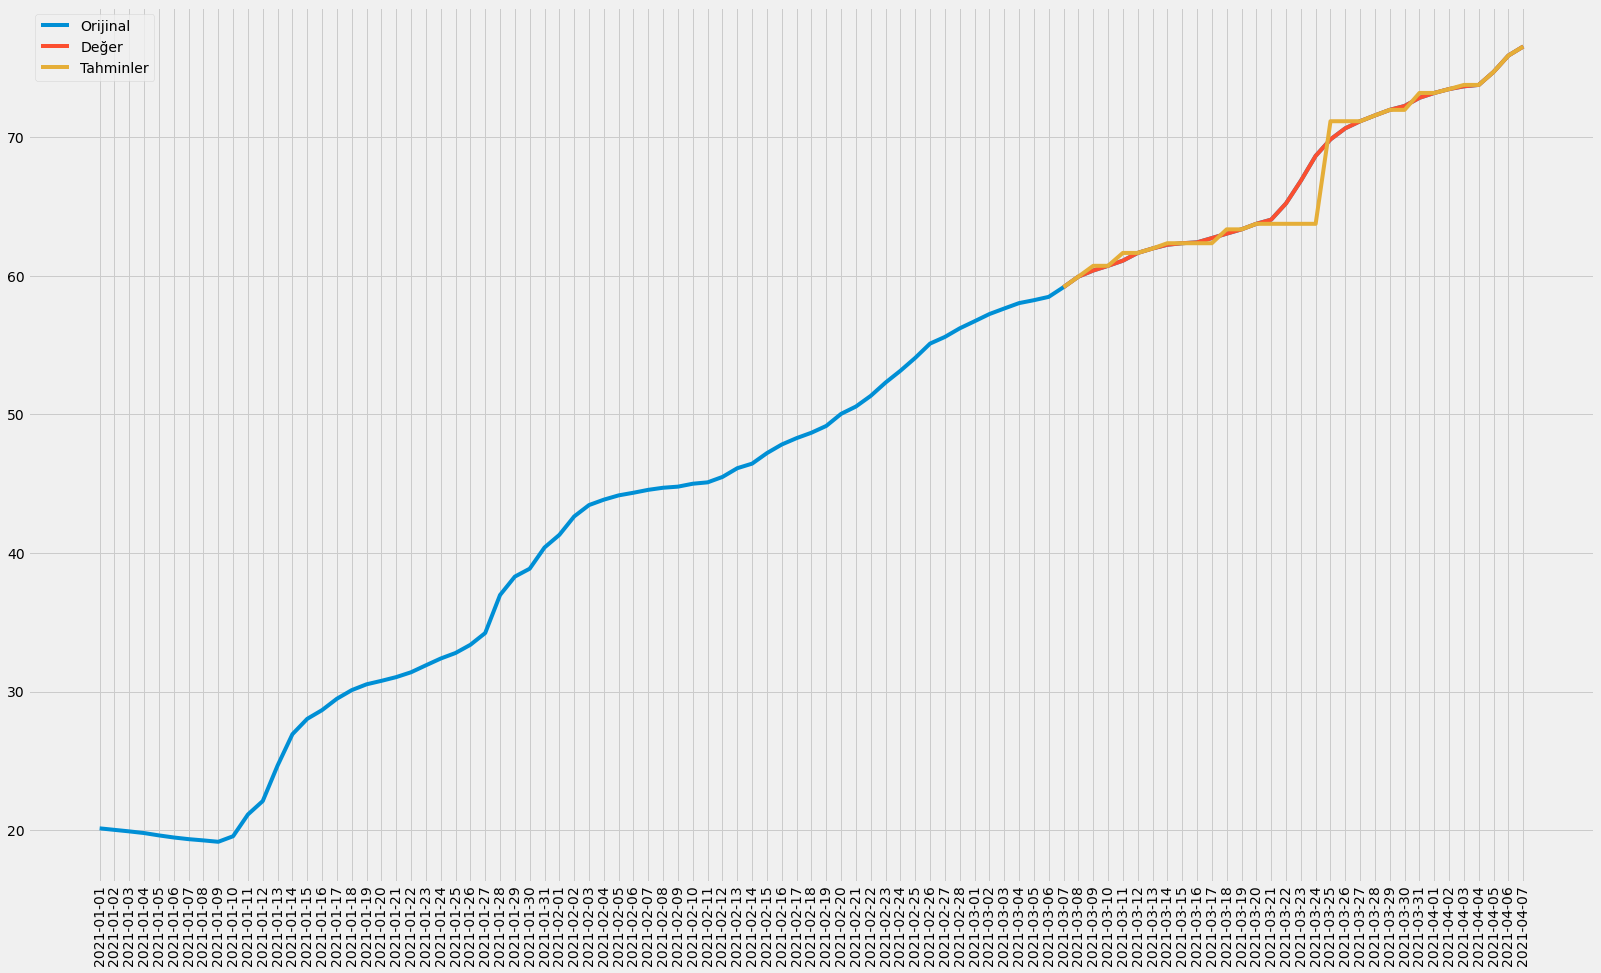

In [241]:
valid = df[X.shape[0]:]
valid['tree_pred'] = tree_pred
plt.figure(figsize=(25,15))
plt.plot(df['GENERAL_DAM_OCCUPANCY_RATE'])
plt.plot(valid[['GENERAL_DAM_OCCUPANCY_RATE', 'tree_pred']])
plt.legend(['Orijinal','Değer','Tahminler'])
plt.xticks(rotation=90)
plt.show()

In [230]:
valid

,GENERAL_DAM_OCCUPANCY_RATE,Predicted,tree_pred
DATE,,,
2021-03-07,59.17,NaN,59.17
2021-03-08,59.93,NaN,59.93
2021-03-09,60.37,NaN,60.71
2021-03-10,60.71,NaN,60.71
2021-03-11,61.08,NaN,61.64
2021-03-12,61.64,NaN,61.64
2021-03-13,61.96,NaN,61.96
2021-03-14,62.23,NaN,62.34
2021-03-15,62.34,NaN,62.34


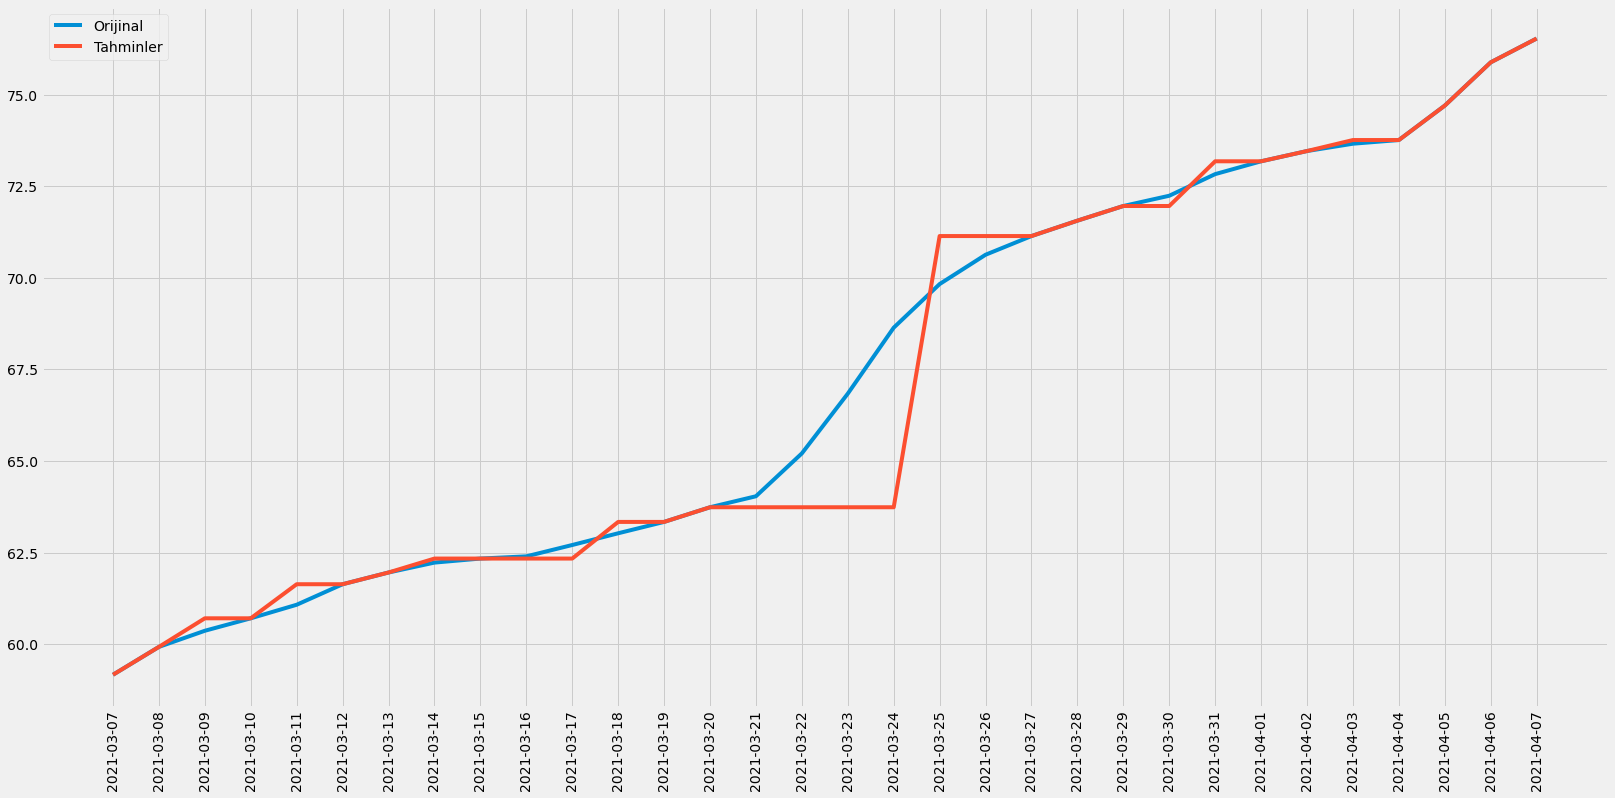

In [232]:
plt.figure(figsize=(25,12))
plt.plot(valid[['GENERAL_DAM_OCCUPANCY_RATE', 'tree_pred']])
plt.legend(['Orijinal','Tahminler'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-240-1ca878df70a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['lr_pred'] = lr_pred


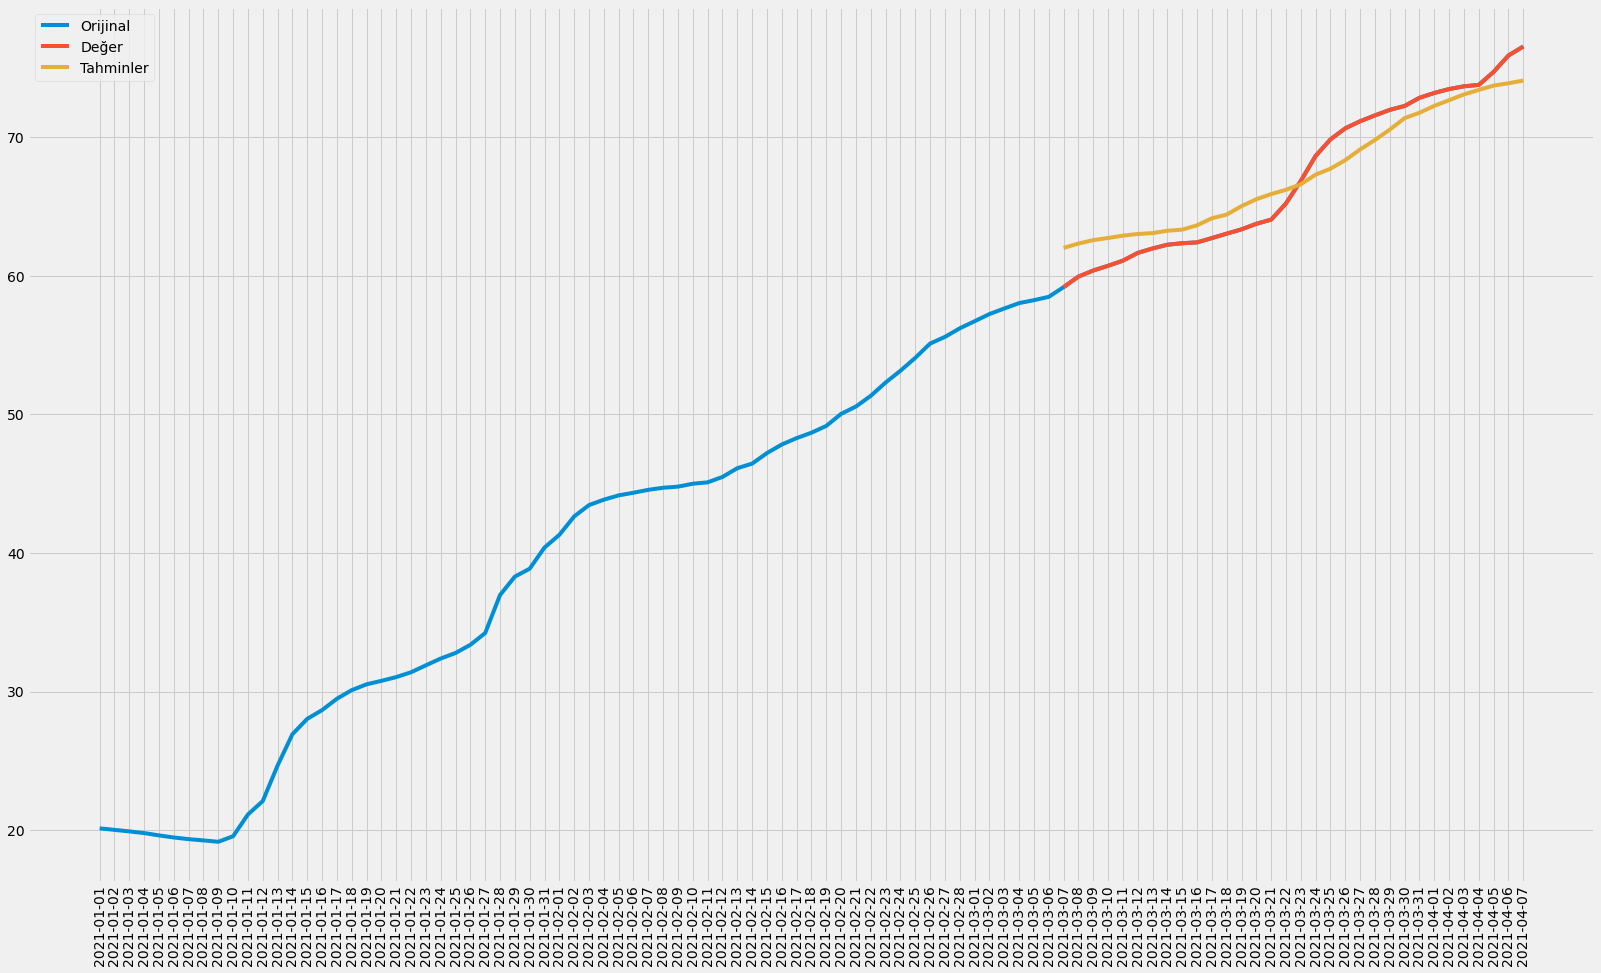

In [240]:
valid = df[X.shape[0]:]
valid['lr_pred'] = lr_pred
plt.figure(figsize=(25,15))
plt.plot(df['GENERAL_DAM_OCCUPANCY_RATE'])
plt.plot(valid[['GENERAL_DAM_OCCUPANCY_RATE', 'lr_pred']])
plt.legend(['Orijinal','Değer','Tahminler'])
plt.xticks(rotation=90)
plt.show()

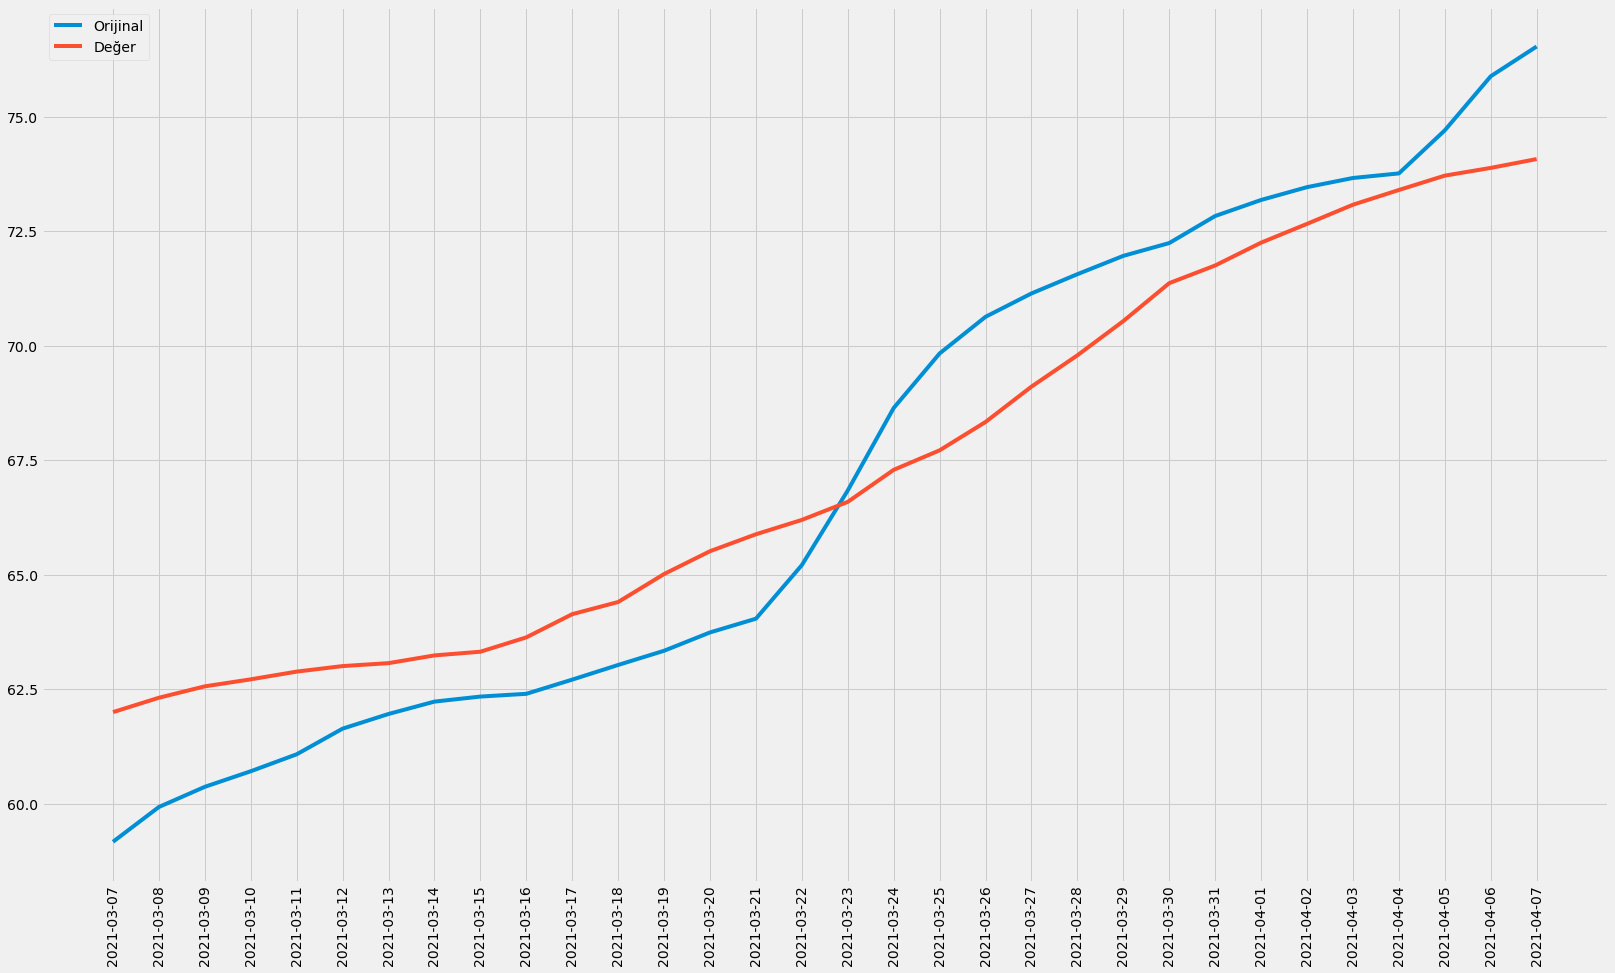

In [239]:
plt.figure(figsize=(25,15))
plt.plot(valid[['GENERAL_DAM_OCCUPANCY_RATE', 'lr_pred']])
plt.legend(['Orijinal','Değer','Tahminler'])
plt.xticks(rotation=90)
plt.show()

In [249]:
valid['tree_pred'] = tree_pred
valid['lr_pred'] = lr_pred

<ipython-input-249-1421fd2b5646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['tree_pred'] = tree_pred
<ipython-input-249-1421fd2b5646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['lr_pred'] = lr_pred


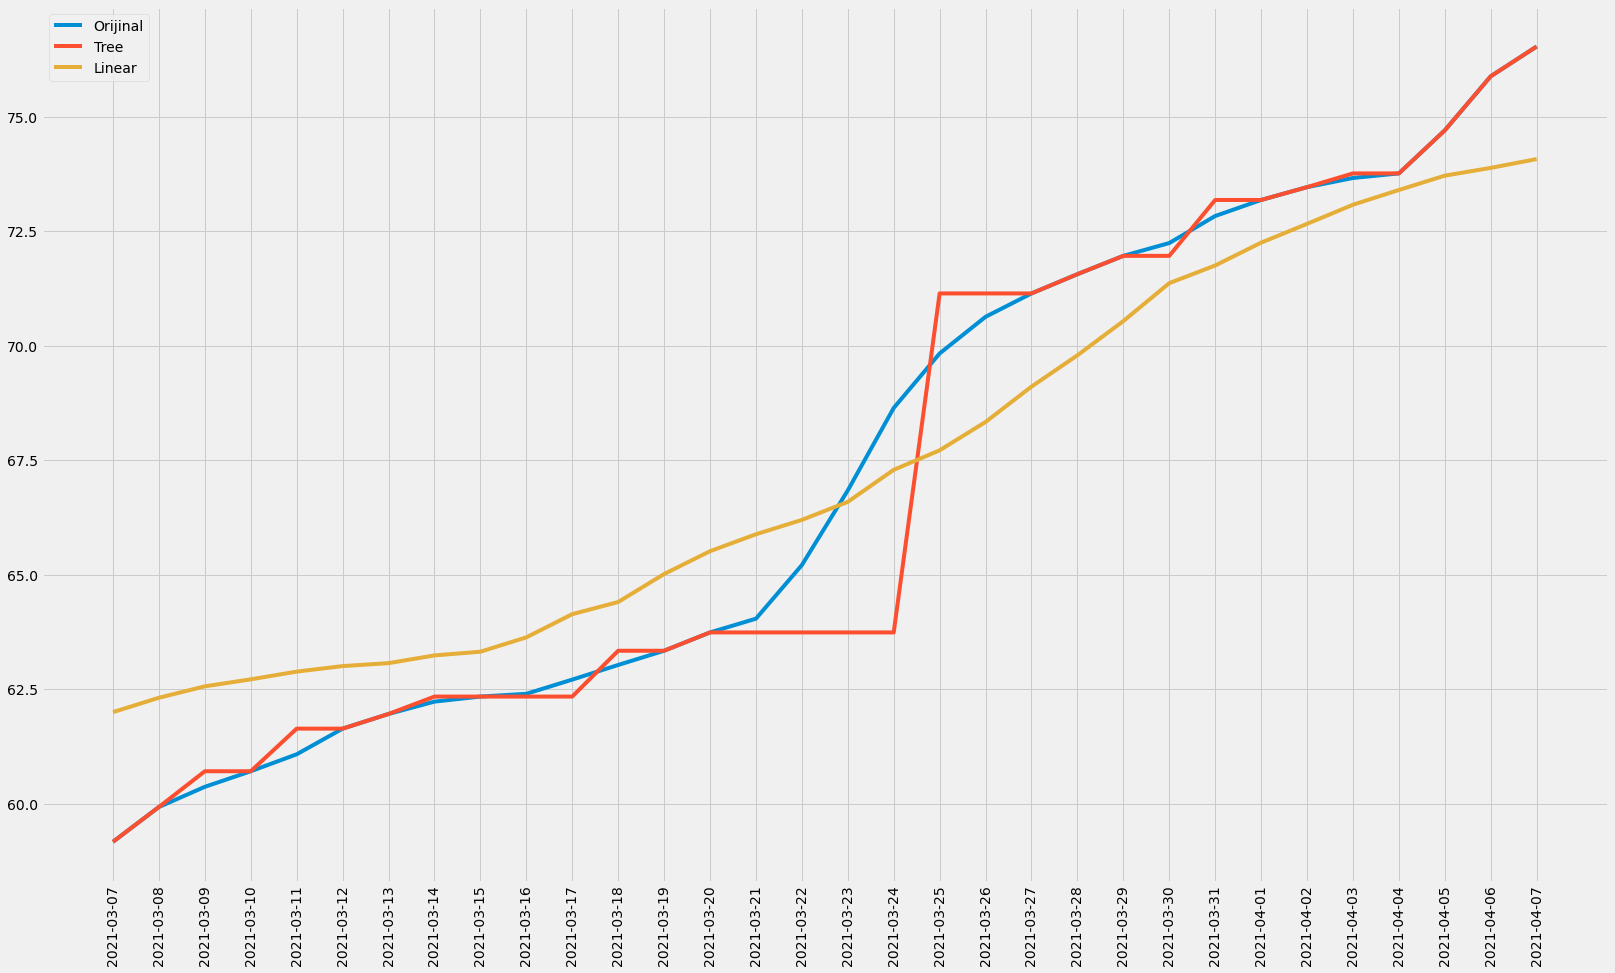

In [250]:
plt.figure(figsize=(25,15))
plt.plot(valid[['GENERAL_DAM_OCCUPANCY_RATE', 'tree_pred', 'lr_pred']])
plt.legend(['Orijinal','Tree','Linear'])
plt.xticks(rotation=90)
plt.show()